# How to Control the Stability of Training Neural Networks With the Batch Size
https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

# Tutorial Overview

# Batch Size and Gradient Descent

# Stochastic, Batch, and Minibatch Gradient Descent in Keras


In [ ]:
Keras allows you to train your model using stochastic, batch, or minibatch gradient descent.

This can be achieved by setting the batch_size argument on the call to the fit() function when training your model.

Let’s take a look at each approach in turn.

Stochastic Gradient Descent in Keras
The example below sets the batch_size argument to 1 for stochastic gradient descent.

...
model.fit(trainX, trainy, batch_size=1)
Batch Gradient Descent in Keras
The example below sets the batch_size argument to the number of samples in the training dataset for batch gradient descent.

...
model.fit(trainX, trainy, batch_size=len(trainX))
Minibatch Gradient Descent in Keras
The example below uses the default batch size of 32 for the batch_size argument, which is more than 1 for stochastic gradient descent and less that the size of your training dataset for batch gradient descent.

...
model.fit(trainX, trainy)
Alternately, the batch_size can be specified to something other than 1 or the number of samples in the training dataset, such as 64.

...
model.fit(trainX, trainy, batch_size=64)

# Multi-Class Classification Problem

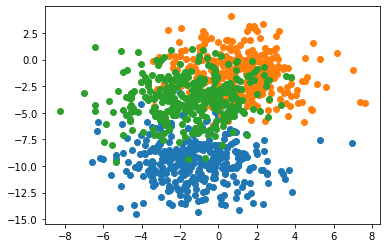

In [1]:

# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

# MLP Fit With Batch Gradient Descent

In [ ]:
We can develop a Multilayer Perceptron model (MLP) to address the multi-class classification problem described in the previous section and train it using batch gradient descent.

Firstly, we need to one hot encode the target variable, transforming the integer class values into binary vectors. This will allow the model to predict the probability of each example belonging to each of the three classes, providing more nuance in the predictions and context when training the model.

# one hot encode output variable
y = to_categorical(y)
Next, we will split the training dataset of 1,000 examples into a train and test dataset with 500 examples each.

This even split will allow us to evaluate and compare the performance of different configurations of the batch size on the model and its performance.

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
We will define an MLP model with an input layer that expects two input variables, for the two variables in the dataset.

The model will have a single hidden layer with 50 nodes and a rectified linear activation function and He random weight initialization. Finally, the output layer has 3 nodes in order to make predictions for the three classes and a softmax activation function.

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
We will optimize the model with stochastic gradient descent and use categorical cross entropy to calculate the error of the model during training.

In this example, we will use “batch gradient descent“, meaning that the batch size will be set to the size of the training dataset. The model will be fit for 200 training epochs and the test dataset will be used as the validation set in order to monitor the performance of the model on a holdout set during training.

The effect will be more time between weight updates and we would expect faster training than other batch sizes, and more stable estimates of the gradient, which should result in a more stable performance of the model during training.

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))
Once the model is fit, the performance is evaluated and reported on the train and test datasets.

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
A line plot is created showing the train and test set accuracy of the model for each training epoch.

These learning curves provide an indication of three things: how quickly the model learns the problem, how well it has learned the problem, and how noisy the updates were to the model during training.

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
Tying these elements together, the complete example is listed below.

Train: 0.822, Test: 0.834


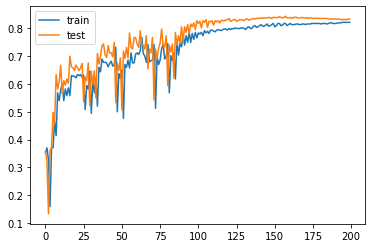

In [16]:

# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# MLP Fit With Stochastic Gradient Descent

Train: 0.474, Test: 0.486


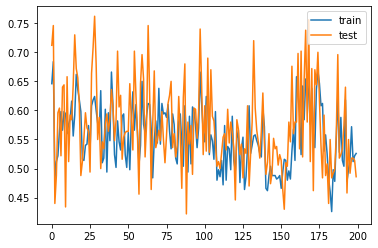

In [18]:
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


Train: 0.832, Test: 0.820


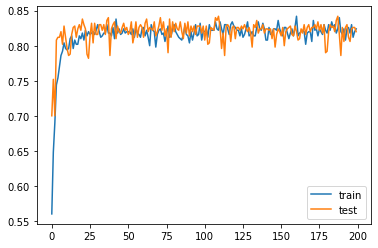

In [20]:
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# This example highlights the important relationship between batch size and the learning rate. Namely, more noisy updates to the model require a smaller learning rate, whereas less noisy more accurate estimates of the error gradient may be applied to the model more liberally. We can summarize this as follows:


# MLP Fit With Minibatch Gradient Descent

Train: 0.812, Test: 0.826


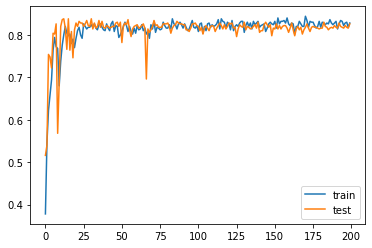

In [23]:

# mlp for the blobs problem with minibatch gradient descent
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=32)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


# Effect of Batch Size on Model Behavior

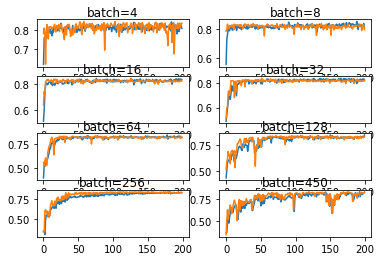

In [34]:

# mlp for the blobs problem with minibatch gradient descent with varied batch size
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
 
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=n_batch)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('batch='+str(n_batch), pad=-40)
 
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
len(batch_sizes)
for i in range(len(batch_sizes)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a batch size
	fit_model(trainX, trainy, testX, testy, batch_sizes[i])
# show learning curves
pyplot.show()

# What if we change learning_rate to 0.001 (Again, with the Minibatch Gradient Descent)?

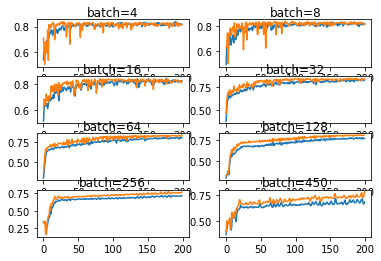

In [35]:

# mlp for the blobs problem with minibatch gradient descent with varied batch size
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
 
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=n_batch)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('batch='+str(n_batch), pad=-40)
 
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
len(batch_sizes)
for i in range(len(batch_sizes)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a batch size
	fit_model(trainX, trainy, testX, testy, batch_sizes[i])
# show learning curves
pyplot.show()